# Assignments_8_PCA_wine

In [24]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [25]:
data=pd.read_csv("wine (1).csv")
data

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [4]:
data[data.duplicated()]

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline


In [5]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df=scaler.fit_transform(data)
scaled_df=pd.DataFrame(df,columns=data.columns)
scaled_df.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,0.0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341
1,0.0,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642
2,0.0,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933
3,0.0,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347
4,0.0,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963


In [6]:
pca = PCA()
pca_values=pca.fit_transform(scaled_df)

In [7]:
pc = pd.DataFrame(pca_values)
pc

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,-0.847604,-0.243146,0.029752,-0.047430,-0.002728,0.038810,0.049146,0.114127,-0.107955,0.291353,0.089500,-0.047503,0.045398,0.031385
1,-0.678651,-0.005712,-0.283970,0.001458,-0.248171,-0.026104,-0.013032,-0.135043,0.082117,0.092704,0.098223,-0.078803,0.055369,0.025409
2,-0.700372,-0.183868,0.197457,0.004297,0.049228,-0.044054,0.141187,-0.086726,-0.167860,-0.148520,-0.030256,-0.035738,0.074816,-0.012202
3,-0.936076,-0.566967,0.093919,-0.110809,0.092336,-0.106658,-0.071420,-0.093214,0.079009,0.026887,0.159666,0.118646,-0.000236,-0.021543
4,-0.454077,-0.063348,0.286092,0.179782,0.008012,0.182285,0.067237,-0.035410,0.058584,0.101458,-0.195057,-0.009654,0.009707,-0.094658
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.898916,-0.482112,0.203259,0.012476,-0.342452,-0.032776,0.066883,0.070463,0.060195,-0.048335,0.085700,-0.029515,0.008320,0.006221
174,0.785427,-0.353231,0.088418,-0.075360,0.008066,0.043131,0.044505,0.067033,-0.006887,-0.092515,0.024457,0.062745,-0.004699,-0.020165
175,0.820658,-0.552469,-0.020750,-0.166405,-0.015765,0.021907,0.193634,-0.036957,-0.004505,0.051149,0.092752,-0.103362,-0.117647,-0.001724
176,0.777268,-0.430255,-0.095511,0.051361,0.215166,-0.044780,0.161557,-0.064202,-0.063602,0.155148,0.105013,-0.013896,-0.032575,0.016204


In [8]:
pca.components_

array([[ 0.6293282 , -0.11538334,  0.18694541, -0.00605884,  0.14898351,
        -0.06546653, -0.29907772, -0.32479936,  0.23920701, -0.18419798,
         0.08078851, -0.20189805, -0.37170465, -0.2400427 ],
       [ 0.01993018, -0.54791647, -0.2344791 , -0.16351603,  0.07620456,
        -0.18485315, -0.06219328,  0.01015402, -0.02206778, -0.02268177,
        -0.52014852,  0.24253447,  0.22768572, -0.43761144],
       [ 0.03341574, -0.08752348,  0.49369469,  0.39251169,  0.47666736,
         0.01701346,  0.26790425,  0.20701857,  0.23278396,  0.24925826,
        -0.02422129, -0.1201589 ,  0.30702977, -0.16025723],
       [-0.29258342,  0.06222583, -0.17547483,  0.20681556,  0.04089069,
        -0.11406464, -0.10022125, -0.07451451,  0.79752561, -0.22126034,
        -0.08760114,  0.27479592, -0.08399171,  0.17729834],
       [ 0.28148105, -0.16228821, -0.66493451,  0.23497092,  0.28992581,
         0.27654331,  0.20490882,  0.12531803,  0.0069295 ,  0.25398196,
         0.27044136,  0.11

In [9]:
var=pca.explained_variance_ratio_
var

array([0.51003634, 0.14853339, 0.06702619, 0.06257153, 0.05009893,
       0.03837954, 0.02882988, 0.01963591, 0.01828022, 0.01769633,
       0.01483498, 0.01075837, 0.00837412, 0.00494429])

In [10]:
var1=np.cumsum(np.round(var,decimals=4)*100)
var1

array([51.  , 65.85, 72.55, 78.81, 83.82, 87.66, 90.54, 92.5 , 94.33,
       96.1 , 97.58, 98.66, 99.5 , 99.99])

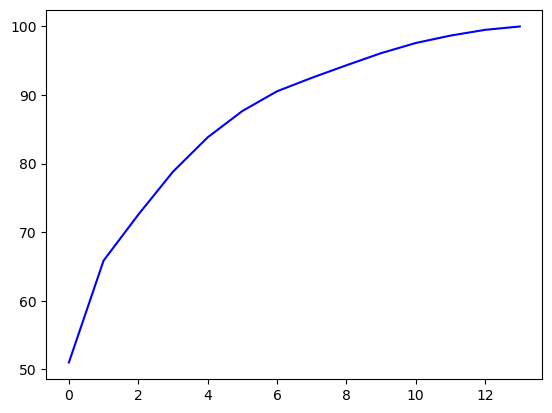

In [17]:
plt.plot(var1,color="blue")

In [35]:
finalDf=pd.concat([pd.DataFrame(pca_values[:,0:3],columns=['pc1','pc2','pc3']),scaled_df],axis=1)

In [36]:
finalDf

,pc1,pc2,pc3,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,-0.847604,-0.243146,0.029752,0.0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341
1,-0.678651,-0.005712,-0.283970,0.0,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642
2,-0.700372,-0.183868,0.197457,0.0,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933
3,-0.936076,-0.566967,0.093919,0.0,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347
4,-0.454077,-0.063348,0.286092,0.0,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.898916,-0.482112,0.203259,1.0,0.705263,0.970356,0.582888,0.510309,0.271739,0.241379,0.056962,0.735849,0.205047,0.547782,0.130081,0.172161,0.329529
174,0.785427,-0.353231,0.088418,1.0,0.623684,0.626482,0.598930,0.639175,0.347826,0.282759,0.086498,0.566038,0.315457,0.513652,0.178862,0.106227,0.336662
175,0.820658,-0.552469,-0.020750,1.0,0.589474,0.699605,0.481283,0.484536,0.543478,0.210345,0.073840,0.566038,0.296530,0.761092,0.089431,0.106227,0.397290
176,0.777268,-0.430255,-0.095511,1.0,0.563158,0.365613,0.540107,0.484536,0.543478,0.231034,0.071730,0.754717,0.331230,0.684300,0.097561,0.128205,0.400856


# As per Question to perform clustering using first 3 principal component scores

In [42]:
finalDf1=finalDf.drop(['Type', 'Alcohol', 'Malic', 'Ash', 'Alcalinity', 'Magnesium', 'Phenols', 'Flavanoids', 'Nonflavanoids', 'Proanthocyanins', 'Color', 'Hue', 'Dilution', 'Proline'],axis =1)
finalDf1

,pc1,pc2,pc3
0,-0.847604,-0.243146,0.029752
1,-0.678651,-0.005712,-0.283970
2,-0.700372,-0.183868,0.197457
3,-0.936076,-0.566967,0.093919
4,-0.454077,-0.063348,0.286092
...,...,...,...
173,0.898916,-0.482112,0.203259
174,0.785427,-0.353231,0.088418
175,0.820658,-0.552469,-0.020750
176,0.777268,-0.430255,-0.095511


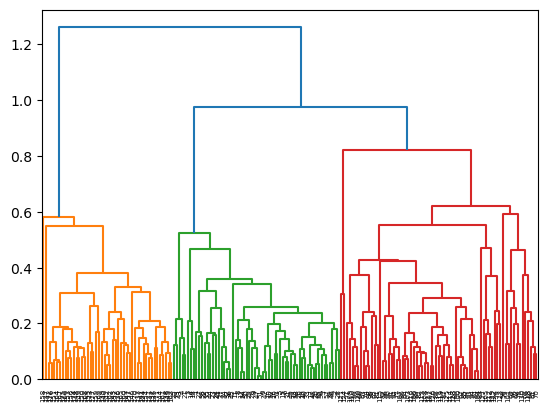

In [43]:
dendrogram = sch.dendrogram(sch.linkage(finalDf1, method = 'average'))

In [44]:
hc = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage = 'average')
y_hc = hc.fit_predict(finalDf1)
clusters=pd.DataFrame(y_hc,columns=['clusters'])
clusters

,clusters
0,2
1,2
2,2
3,2
4,2
...,...
173,1
174,1
175,1
176,1


In [45]:
finalDf1['h_clusterid'] = clusters
finalDf1

,pc1,pc2,pc3,h_clusterid
0,-0.847604,-0.243146,0.029752,2
1,-0.678651,-0.005712,-0.283970,2
2,-0.700372,-0.183868,0.197457,2
3,-0.936076,-0.566967,0.093919,2
4,-0.454077,-0.063348,0.286092,2
...,...,...,...,...
173,0.898916,-0.482112,0.203259,1
174,0.785427,-0.353231,0.088418,1
175,0.820658,-0.552469,-0.020750,1
176,0.777268,-0.430255,-0.095511,1


In [46]:
from sklearn.cluster import KMeans

In [58]:
wcss = []

kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(finalDf1)
wcss.append(kmeans.inertia_)

wcss

[18.652502564267856]

In [59]:
kmeans.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [60]:
finalDf1 = pd.DataFrame(finalDf1)

finalDf1['cluster_3'] = kmeans.labels_

finalDf1.head()

,pc1,pc2,pc3,h_clusterid,cluster_3,clusterid_new
0,-0.847604,-0.243146,0.029752,2,2,1
1,-0.678651,-0.005712,-0.283970,2,2,1
2,-0.700372,-0.183868,0.197457,2,2,1
3,-0.936076,-0.566967,0.093919,2,2,1
4,-0.454077,-0.063348,0.286092,2,2,1


C:\Users\Rishi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


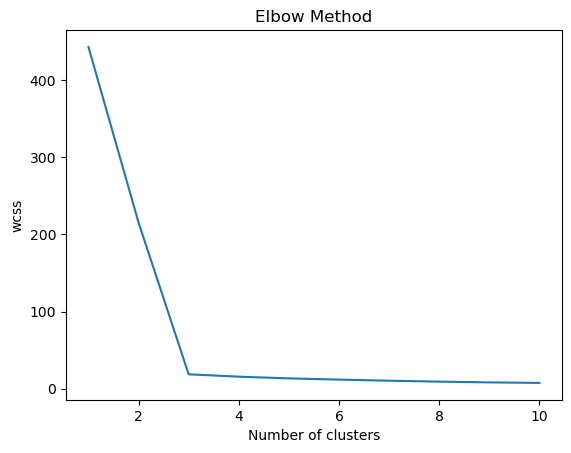

In [61]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(finalDf1)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

In [62]:
wcss

[443.0462739019042,
 215.36931194992775,
 18.652502564267856,
 15.578505511427974,
 13.375195474079748,
 11.79631963264556,
 10.36242188214756,
 9.153812907179718,
 8.179715807288515,
 7.487187641326426]

In [64]:
from sklearn.cluster import KMeans
clusters_new = KMeans(4, random_state=40)
clusters_new.fit(finalDf1)

KMeans(n_clusters=4, random_state=40)

In [65]:
clusters_new.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 0, 3, 1, 3, 3, 3, 3, 3, 0, 3, 3, 3, 2, 3, 3, 3, 0,
       0, 0, 3, 3, 3, 0, 3, 3, 3, 3, 3, 0, 3, 3, 0, 3, 3, 0, 3, 3, 3, 0,
       0, 3, 0, 3, 0, 0, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [66]:
finalDf1['clusterid_new'] = clusters_new.labels_
finalDf1

,pc1,pc2,pc3,h_clusterid,cluster_3,clusterid_new
0,-0.847604,-0.243146,0.029752,2,2,1
1,-0.678651,-0.005712,-0.283970,2,2,1
2,-0.700372,-0.183868,0.197457,2,2,1
3,-0.936076,-0.566967,0.093919,2,2,1
4,-0.454077,-0.063348,0.286092,2,2,1
...,...,...,...,...,...,...
173,0.898916,-0.482112,0.203259,1,0,2
174,0.785427,-0.353231,0.088418,1,0,2
175,0.820658,-0.552469,-0.020750,1,0,2
176,0.777268,-0.430255,-0.095511,1,0,2
